# Estadística Descriptiva & Pruebas de hipótesis


- Librería básica: scipy.stats (importado como `stats`)

- `SciPy` es una biblioteca de computación científica que utiliza `NumPy` como base.

- SciPy significa *Scientific Python*.

- Proporciona más funciones de utilidad para optimización, álgebra lineal, funciones especiales, procesamiento de señales, entre otras.

- Al igual que `NumPy`, `SciPy` es de código abierto, por lo que podemos usarlo libremente.

- `SciPy` fue creado por el creador de `NumPy`, [Travis Olliphant](https://es.wikipedia.org/wiki/Travis_Oliphant).




## Medidas de resumen

### Medidas de tendencial central

Creamos 100 números aleatorios con distribución normal:

In [1]:
import numpy as np
N = 100
np.random.seed(85) # genera una semilla para los números aleatorios
x = np.random.normal(loc = 0, scale = 1, size = N)

#### Promedio

> Promedio o media: notado como $\bar{x}$, de un conjunto de $n$ datos $x_1,x_2,\ldots,x_n$ es igual a la suma de valores dividido para $n$.

$$
\bar{x} = \frac{x_1+x_2+\ldots+x_n}{n}=\frac{\sum_{i=1}^nx_i}{n}
$$

-   Si las observaciones están agrupadas en una tabla de frecuencia de datos individuales de $k$ valores, el promedio se calcula

$$
\bar{x} =\frac{\sum_{i=1}^kn_ix_i}{n}
$$
donde $n = {\sum_{i=1}^kn_i}$.


-   Si las observaciones están agrupadas en una tabla de frecuencias agrupadas por clases, se calcula el punto promedio de cada clase $x_i = \frac{l_i+s_i}{2}$ ($i = 1,2,\ldots,k$), donde $l_i$ y $s_i$ son la cota inferior y superor de cada clase respectivamente. El promedio es

$$
\bar{x} =\frac{\sum_{i=1}^kn_ix_i}{n}
$$

Ventajas y desventajas del promedio:

-   Se expresan en las mismas unidades quela variable
-   En su cálculo intervienen todos los valores de la distribución
-   Es el centro de gravedad de toda la distribución
-   Es único
-   Su principal inconveniente es que se ve afectado por valores atípicos


In [2]:
np.mean(x)

-0.07448679690601528

Toma en cuenta lo que pasa con valores `nan`. `hstack` agrega valores al vector:

In [3]:
x1 = np.hstack((x,np.nan))

In [4]:
np.mean(x1)

nan

In [5]:
np.nanmean(x1)

-0.07448679690601528

In [6]:
np.nanstd(x1)

1.0336795016636526

In [7]:
np.nanvar(x1)

1.0684933121596172

In [8]:
np.median(x)

-0.15334269473584197

#### Mediana

> La mediana de un conjunto de datos $x_1+x_2+\ldots+x_n$ es el valor que se encuentra en el punto medio, cuando se ordenan los valores de menor a mayor.

Se nota como $Q_2$ o *Med* y tiene la propiedad de que a cada lado se encuentra el 50% de los datos.


Ventajas:

-   No se ve afectada por valores extremos o atípicos

- Fácil de interpretar como el "valor medio" de un conjunto de datos. Divide los datos en dos mitades.

- En distribuciones asimétricas, la mediana proporciona una mejor representación del centro que la media, ya que no se ve arrastrada hacia la cola de la distribución.

Desventajas:

- La mediana es menos sensible a los cambios en los valores de los datos individuales en comparación con la media.

- A diferencia de la media, la mediana no toma en cuenta todos los valores del conjunto de datos, sino solo el valor central. 

In [9]:
np.median(x)

-0.15334269473584197

#### La moda

> Es el valor que más se repite en un conjunto de datos.

Ventajas:

-   Fácil de entender y calcular, especialmente en conjuntos de datos pequeños o cuando se analizan datos categóricos.

- Única medida de tendencia central que puede aplicarse a datos cualitativos o categóricos, como colores, marcas o tipos

- La moda no se ve influenciada por valores atípicos o extremos.

Desventajas:

- Puede haber más de una moda (multimodal), lo que complica la interpretación.

- La moda no siempre representa bien el centro de la distribución, especialmente en distribuciones con una moda que es significativamente diferente de la media o la mediana.

- Para datos continuos, la moda es menos útil, ya que cada valor puede ser único o tener una baja frecuencia, dificultando la identificación de una moda clara.

In [10]:
from scipy import stats

In [11]:
data = [5,3,7,7,9,7]

In [12]:
stats.mode(data)

ModeResult(mode=7, count=3)

Cuando tenemos resultados en varios elementos como el anterior `(mode=7, count=3)`, podemos guardarlos de la siguiente manera:

In [13]:
(valor, freq) = stats.mode(data)
(valor, freq)

(7, 3)

### Medidas de Dispersión

#### Rango

> Diferencia entre el valor más alto y el valor más bajo


Ventajas:

- Fácil de calcular y comprender.

- Proporciona una idea rápida de la amplitud de los datos, lo que puede ser útil para comparar la variabilidad entre diferentes conjuntos de datos.

Desventajas:

- El rango se ve afectado por los valores atípicos, ya que depende únicamente de los valores máximo y mínimo. Un solo valor extremo puede distorsionar significativamente el rango.

- Dos conjuntos de datos con el mismo rango pueden tener distribuciones internas muy diferentes.


En Python se usa la función `np.ptp` donde `ptp` significa `peak to peak`


In [14]:
range = np.ptp(x)

In [15]:
range

4.142508144337905

#### Desviación estándar

Fue introducida por Karl Person en 1894 y se define:

> La desviación estándar (o desviación típica), notada por $s$, de un conjunto de $n$ mediciones $x_1+x_2+\ldots+x_n$ es la raíz cuadrada de las desviaciones de las mediciones, respecto al promedio $\bar{x}$, dividida entre $n-1$; es decir 

$$
s  = \sqrt{\frac{1}{n-1}\sum_{i = 1}^{n}(x_i-\bar{x})^2}
$$

-   Se expresa en las mismas unidades que los datos originales
-   En su cálculo intervienen todos los valores de la distribución
-   Es única
-   Se ve afectada por valores atípicos

In [16]:
np.std(x)

1.0336795016636526

#### Varianza

In [17]:
np.var(x)

1.0684933121596172

#### Cuantiles

> Un cuantil divide la distribución de los datos en una proporción específica, el cuantil es el dato que corresponde a dicha división.

El cuantil de orden $p$ de una distribución (con $0 < p < 1$) es el valor de la variable  $x_{p}$ que marca un corte de modo que una proporción $p$ de valores de la población es menor o igual que $x_{p}$. Por ejemplo, el cuantil de orden $0.36$ dejaría un 36% de valores por debajo y el cuantil de orden $0.50$ se corresponde con la mediana de la distribución.



Los cuantiles suelen usarse por grupos que dividen la distribución en partes iguales; entendidas estas como intervalos que comprenden la misma proporción de valores. Los más usados son:

-   Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles $0.25$; $0.50$ y $0.75$);
-   Los quintiles, que dividen a la distribución en cinco partes (corresponden a los cuantiles $0.20$; $0.40$; $0.60$ y $0.80$);
-   Los deciles, que dividen a la distribución en diez partes;
-   Los percentiles, que dividen a la distribución en cien partes.

In [18]:
from scipy import stats

#https://docs.scipy.org/doc/scipy/reference/stats.html
stats.mstats.mquantiles(x)

array([-0.97667604, -0.15334269,  0.70789384])

In [19]:
stats.mstats.mquantiles(x,prob=np.arange(0,1.1,0.1))

array([-1.76475402, -1.38045444, -1.05285905, -0.76411302, -0.49263867,
       -0.15334269,  0.16959572,  0.45482   ,  0.92681765,  1.44781882,
        2.37775412])

In [20]:
stats.describe(x)

DescribeResult(nobs=100, minmax=(-1.7647540193678475, 2.3777541249700573), mean=-0.07448679690601528, variance=1.0792861738986033, skewness=0.3655289306119107, kurtosis=-0.7791352022265521)

## Distribuciones

In [21]:
miFD = stats.norm(5,3)

In [22]:
miFD

In [23]:
x = np.linspace(-5,15,101)
y1 = miFD.pdf(x) # densidad
y2 = miFD.cdf(x) # acumulada
y3 = miFD.ppf(y2) # cuantil

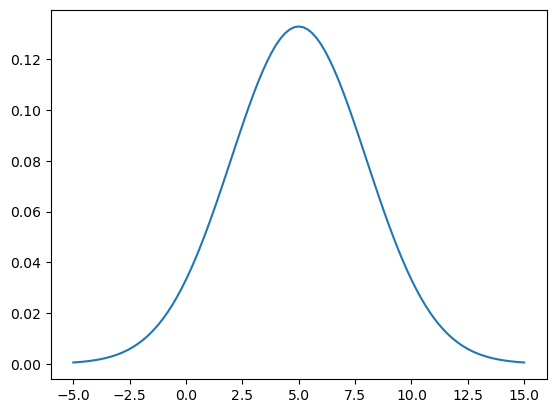

In [24]:
#%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x,y1,'-');

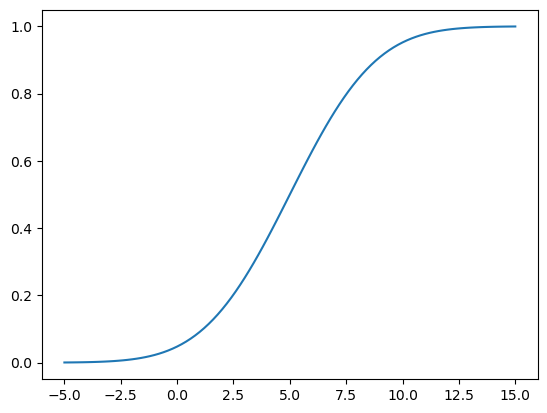

In [25]:
plt.figure()
plt.plot(x,y2,'-');

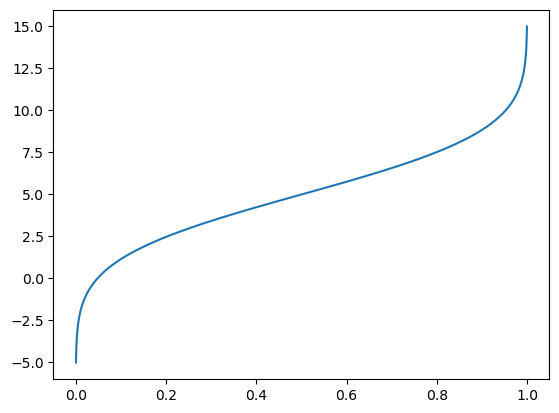

In [26]:
plt.figure()
x1 = np.linspace(0,1, len(y3))
plt.plot(y2,y3,'-');

Distribución acumulada empírica

In [27]:
x = stats.norm.rvs(loc=0,scale=1,size=1000) # distribucion normal estandar
x = np.sort(x) # odenamos los valores de la variable
n = x.size # tamano de la muestra
y = np.arange(1, n+1) / n # % acumulado

Text(0, 0.5, 'y')

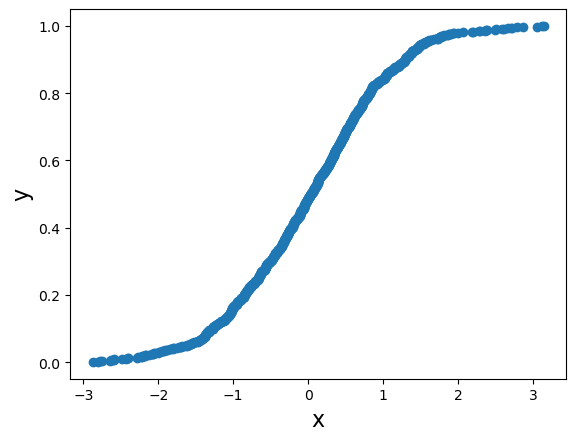

In [28]:
plt.figure()
plt.scatter(x=x, y=y);
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(x)

In [30]:
ecdf(1.5)

0.9440000000000001

QQ plot

In [31]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot
nsample = 100
np.random.seed(7654321)

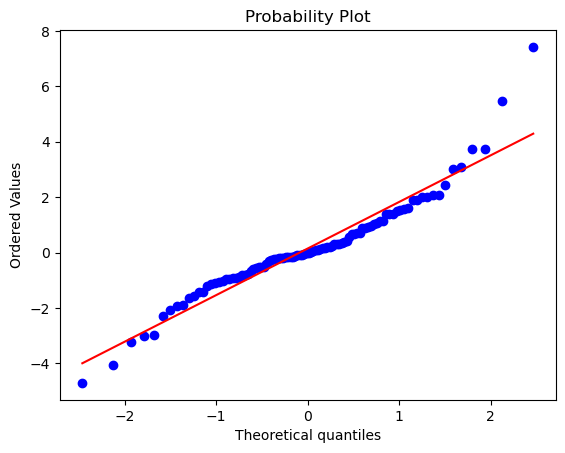

In [32]:
plt.figure()
x = stats.t.rvs(df=3, size=nsample)
res = stats.probplot(x, plot=plt)

## Test sobre una y dos muestras

Se introducen dos funciones: `stats.ttest_1samp` y `stats.wilcoxon` para el test t y el test de Wilcoxon respectivamente. Ambos pueden ser usados para una muestra o dos muestras así como para datos pareados. Note que el test de Wilcoxon para dos muestras es lo mismo que el test de Mann–Whitney.

### El test t

Este test se basa en el supuesto de normalidad de los datos. Es decir que los datos $x_1\ldots,x_n$ se asumen como realizaciones independientes de variables aleatorias con media $\mu$ y varianza $\sigma^2$, $N(\mu, \sigma^2)$. Se tiene que la hipótesis nula es que $\mu=\mu_0$.

Se puede estimar los parámetros $\mu$ y $\sigma$ por la media $\bar{x}$ y la desviación estándar  $\sigma$, aunque recuerde que solo son estimaciones del valor real.

Veamos un ejemplo del consuo diario de calorías de 11 mujeres:

In [33]:
daily_intake = [5260,5470,5640,6180,6390,6515,
                  6805,7515,7515,8230,8770]

Veamos algunas estadísticas de resumen:

In [34]:
stats.describe(daily_intake)

DescribeResult(nobs=11, minmax=(5260, 8770), mean=6753.636363636364, variance=1304445.4545454548, skewness=0.3674679616524392, kurtosis=-0.9757942883536157)

Se podría querer saber si el consumo de energía de las mujeres se desvía de una valor recomendado de $7725$. Asumiendo que los datos vienen de una distribución normal, el objetivo es hacer una prueba para saber si la media de la distribución es $\mu = 7725$.

In [35]:
stats.ttest_1samp(daily_intake,7725)

TtestResult(statistic=-2.8207540608310193, pvalue=0.018137235176105812, df=10)

In [36]:
t, pval = stats.ttest_1samp(daily_intake,7725)

In [37]:
t

-2.8207540608310193

In [38]:
pval

0.018137235176105812

### Wilcoxon

In [39]:
(rank, pVal) = stats.wilcoxon(x=(np.array(daily_intake)-7725))

In [40]:
(rank, pVal)

(8.0, 0.0244140625)

Para efectos prácticos, cuando se trata de una muestra, el test t y el de Wilcoxon suelen arrojar resultados muy similares.

## Test t para dos muestras

Se usa esta prueba con la hipótesis nula de que dos muestras provengan de distribuciones normales con la misma media.

Se puede tener dos enfoques, que las muestras tengan la misma varianza (enfoque clásico) o difieran en varianza.

In [41]:
import numpy as np
from scipy import stats
import os as os
import pandas as pd
#os.chdir('C:/Users/VICTOR/Documents/AnalyticsPython/Data')

energy = pd.read_csv('Data/energy.csv')
energy.head()


,expend,stature
0,9.21,obese
1,7.53,lean
2,7.48,lean
3,8.08,lean
4,8.09,lean


In [42]:
g1 = energy[energy.stature=='obese'].expend.values
g2 = energy[energy.stature=='lean'].expend.values
stats.ttest_ind(g2,g1,equal_var=False)

TtestResult(statistic=-3.855503558973697, pvalue=0.0014106918447179043, df=15.91873619676766)

In [43]:
stats.ttest_ind(g2,g1,equal_var=True)

TtestResult(statistic=-3.9455649161549835, pvalue=0.0007989982111700593, df=20.0)

### Comparación de varianzas

Aún cuando en `python` se puede hacer la prueba sobre dos muestras sin el supuesto de igualdad en las varianzas, podrías estar interesado en hacer una prueba exclusiva de este supuesto.

In [44]:
import statistics 
F = statistics.variance(g2)/statistics.variance(g1)
df1 = len(g1) - 1
df2 = len(g2) - 1
alpha = 0.05 
p_value = stats.f.cdf(F, df2, df1)
(F,p_value*2)

(0.7844459792357035, 0.6797459853760682)

### Test de Wilcoxon para dos muestras

In [45]:
u_statistic, pVal = stats.mannwhitneyu(g1, g2)

In [46]:
(u_statistic, pVal*2)

(105.0, 0.004243226771760098)

## Correlación


Se aborda a continuación medidas de correlación paramétricas y no paramétricas. El coeficiente de correlación es una medida de asociación que varía entre -1 y 1.

### Correlación de Pearson

El coeficiente de correlación empírico es:

$$ r = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i-\bar{x})^2\sum (y_i-\bar{y})^2}} $$

La función cor en `python` calcula la correlación entre dos o más vectores.

In [47]:
#import os as os
#os.chdir('C:/Users/VICTOR/Documents/AnalyticsPython/Data')
import pandas as pd
datos = pd.read_csv('Data/company_sales_data.csv')

In [48]:
datos

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


<Axes: xlabel='shampoo', ylabel='bathingsoap'>

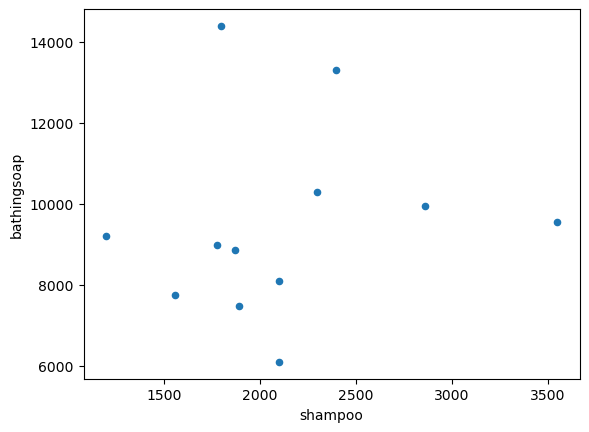

In [49]:
datos.plot('shampoo','bathingsoap',kind = 'scatter')

In [50]:
np.corrcoef(datos.shampoo,datos.bathingsoap)

array([[1.        , 0.13756757],
       [0.13756757, 1.        ]])

In [51]:
stats.pearsonr(datos.shampoo,datos.bathingsoap) # devuelve la correlacion y el p-valor

PearsonRResult(statistic=0.1375675688230804, pvalue=0.6698531673457456)

In [52]:
stats.spearmanr(datos.shampoo,datos.bathingsoap)   # Spearman's rho

SignificanceResult(statistic=0.2907184843604137, pvalue=0.35929281767147814)

In [53]:
stats.kendalltau(datos.shampoo,datos.bathingsoap)  # Kendall's tau

SignificanceResult(statistic=0.10687334289668038, pvalue=0.6304167324095717)

Interpretación de la correlación:

-  La correlación esta siempre entre -1 y 1. Lo primero que se interpreta es el signo
-  Directamente proporcional si es positivo, si es negativo pasa lo contrario
-  En segundo lugar se interpreta es la fuerza de la relación. Si esta más cerca de 1, significa que si aumenta una variable, la otra también.
-  Números intermedios, reducen la fuerza de la relación.